## Importing data

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\vs code\scraping\glass_door_salary_data.csv", encoding="cp1252")

# Get unique job titles
unique_job_titles = df['Jobtitle'].unique()

df['Min Salary']=df['Min Salary'].apply(lambda x: x.replace('$', ''))
df['Min Salary']=df['Min Salary'].apply(lambda x: x.replace('K', ''))

df['Max Salary']=df['Max Salary'].apply(lambda x: x.replace('$', ''))
df['Max Salary']=df['Max Salary'].apply(lambda x: x.replace('K', ''))

data01=df[['Min Salary','Max Salary']]
data=df[['Min Salary','Max Salary']]
# Display the unique job titles
# print(unique_job_titles)


In [2]:
data01.head()

,Min Salary,Max Salary
0,98,154
1,37,60
2,99,141
3,88,149
4,33,44


In [3]:
data['salary avg']=(data['Max Salary']+data['Min Salary'])

C:\Users\Ramzan Khan\AppData\Local\Temp\ipykernel_22420\2063772545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary avg']=(data['Max Salary']+data['Min Salary'])


In [4]:
data['salary avg'].astype(str).astype(int)

0       15498
1        6037
2       14199
3       14988
4        4433
        ...  
4200     6744
4201    13175
4202     4833
4203    11768
4204    15383
Name: salary avg, Length: 4205, dtype: int32

## 1 K-Means Clustering:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


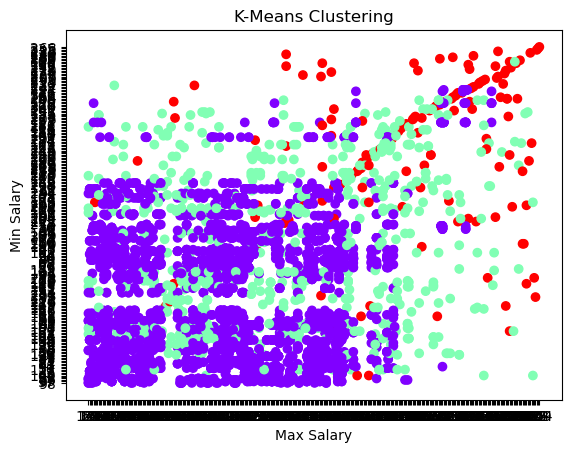

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)
df['K-Means'] = kmeans.predict(data)

plt.scatter(df['Max Salary'], df['Min Salary'], c=df['K-Means'], cmap='rainbow')
plt.xlabel('Max Salary')
plt.ylabel('Min Salary')
plt.title('K-Means Clustering')
plt.show()

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


## 2 Hierarchical Clustering:

In [6]:
data01['Min Salary']= data01['Min Salary'].astype(str).astype(int)
data01['Max Salary']= data01['Max Salary'].astype(str).astype(int)

C:\Users\Ramzan Khan\AppData\Local\Temp\ipykernel_22420\1668653235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data01['Min Salary']= data01['Min Salary'].astype(str).astype(int)
C:\Users\Ramzan Khan\AppData\Local\Temp\ipykernel_22420\1668653235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data01['Max Salary']= data01['Max Salary'].astype(str).astype(int)


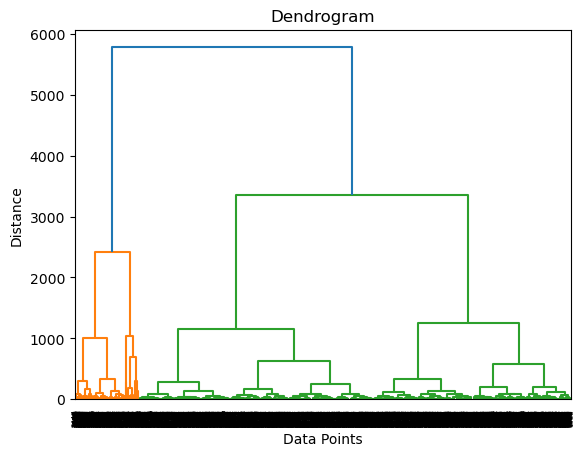

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Compute the Euclidean distance matrix
dist_matrix = pdist(data01)

# Perform hierarchical clustering using linkage
linkage_matrix = linkage(dist_matrix, method='ward')
# df['Hierarchical'] = linkage_matrix
# Plot a dendrogram
dendrogram(linkage_matrix, labels=data.index)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


## 3 DBSCAN:

In [8]:
X_=data01.values

Estimated number of clusters: 1
Estimated number of noise points: 21


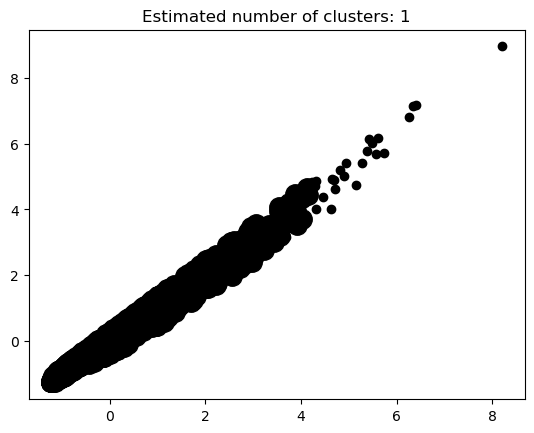

In [9]:
# Import the necessary libraries
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(0)
n_samples = data['Max Salary'].min() #300
# X = np.random.randn(n_samples, 2)
X=X_
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create and fit a DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Get the cluster labels
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Print the number of clusters and noise points
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Visualize the clusters
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(labels)

# Plot the clusters
for label in unique_labels:
    if label == -1:
        col = 'k'
    else:
        col = plt.cm.nipy_spectral(float(label) / n_clusters_)

    class_member_mask = (labels == label)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()


## 4 Mean Shift Clustering:

In [10]:
# Convert the DataFrame to a numpy array
data_x = data01.to_numpy()

# Get the shape of the existing data
shape = data_x.shape

# Generate synthetic data with the same shape and properties
synthetic_data = np.random.rand(*shape)

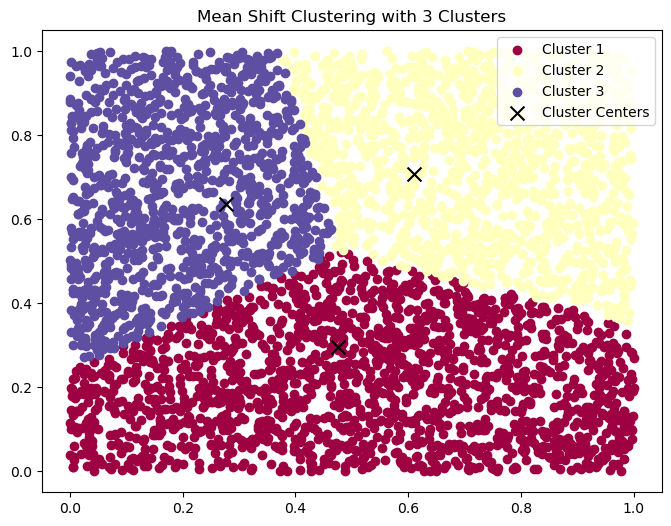

In [11]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate a random dataset for demonstration
#data, _ =  make_blobs(n_samples=data['Min Salary'].min(), centers=3, cluster_std=1.0, random_state=42)
data = synthetic_data
# Estimate the bandwidth (bandwidth is an important parameter for Mean Shift)
bandwidth = estimate_bandwidth(data, quantile=0.2)

# Fit the Mean Shift model
ms = MeanShift(bandwidth=bandwidth)
ms.fit(data)

# Get cluster labels
labels = ms.labels_

# Get cluster centers
cluster_centers = ms.cluster_centers_

# Number of clusters
n_clusters = len(cluster_centers)

# Plot the data points and cluster centers
plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=[colors[i]], label=f'Cluster {i+1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], marker='x', c='k', s=100, label='Cluster Centers')
plt.legend()
plt.title(f'Mean Shift Clustering with {n_clusters} Clusters')
plt.show()


## 5 Agglomerative Clustering:

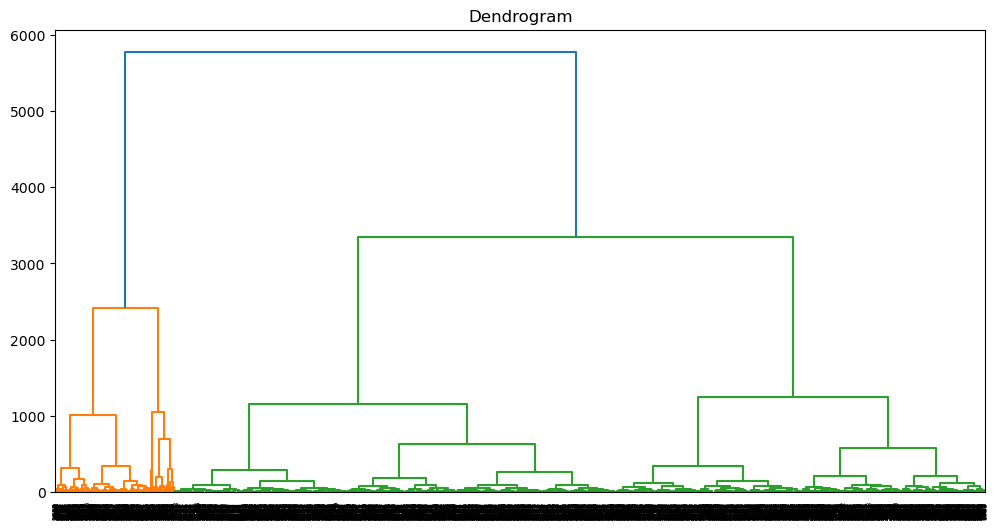

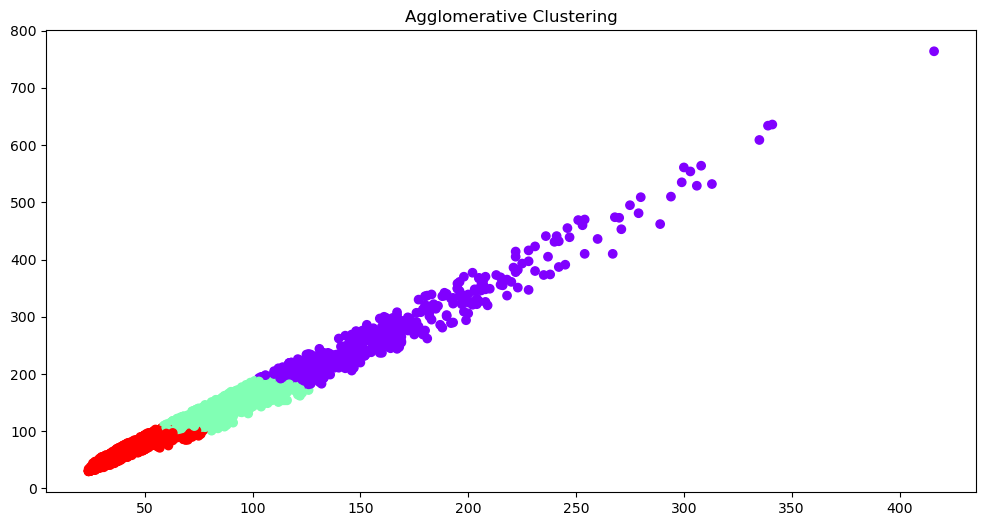

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
# iris = load_iris()
X = X_  #iris.data

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Specify the number of clusters you want
agg_labels = agg_clustering.fit_predict(X)
# df['agg_clustering']= agg_clustering.fit_predict(X)
# Visualize the results
plt.figure(figsize=(12, 6))

# Dendrogram
dendrogram(linkage(X, method='ward'))
plt.title("Dendrogram")
plt.show()

# Scatter plot of the data with clustering results
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.show()


## 6 OPTICS:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:992: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


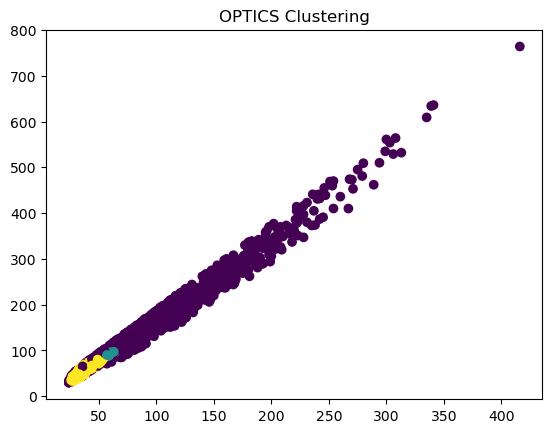

In [13]:
import numpy as np
from sklearn.datasets import make_blobs

X=X_ #, _ = make_blobs(n_samples=300, centers=3, random_state=42)


from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
optics.fit(X)


import matplotlib.pyplot as plt

# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=optics.labels_, cmap='viridis')
plt.title('OPTICS Clustering')
plt.show()


## 7 BIRCH:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_birch.py:725: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


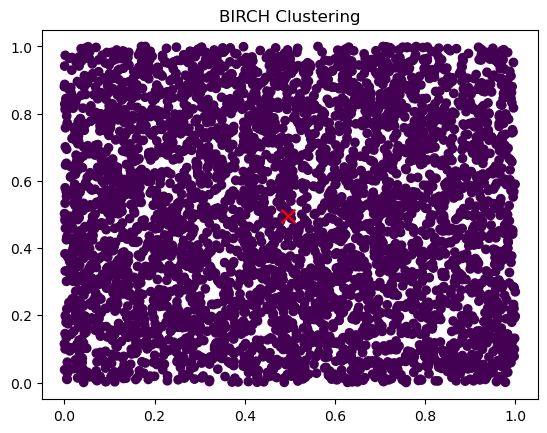

In [14]:
import numpy as np
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate a synthetic dataset for demonstration
data =synthetic_data#, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Create a BIRCH clustering model
birch = Birch(threshold=0.5, n_clusters=3)

# Fit the model to the data
birch.fit(data)

# Get cluster labels for each data point
cluster_labels = birch.labels_

# Get cluster centers
cluster_centers = birch.subcluster_centers_

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], c='red', marker='x', s=100)
plt.title("BIRCH Clustering")
plt.show()


## 8 Spectral Clustering:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering


data =synthetic_data #, labels = make_moons(n_samples=200, noise=0.05, random_state=0)

In [16]:
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity='rbf')
cluster_labels = spectral.fit_predict(data)

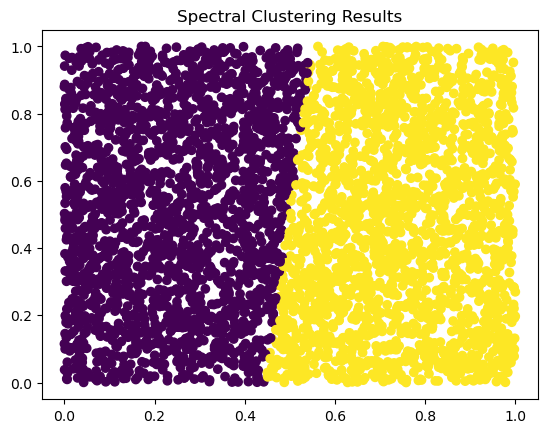

In [17]:
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Spectral Clustering Results")
plt.show()

## 9 Affinity Propagation:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\Ramzan Khan\AppData\Local\Temp\ipykernel_22420\4278947428.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data[cluster_mask, 0], data[cluster_mask, 1], c=color, label=f'Cluster {cluster_idx}')
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


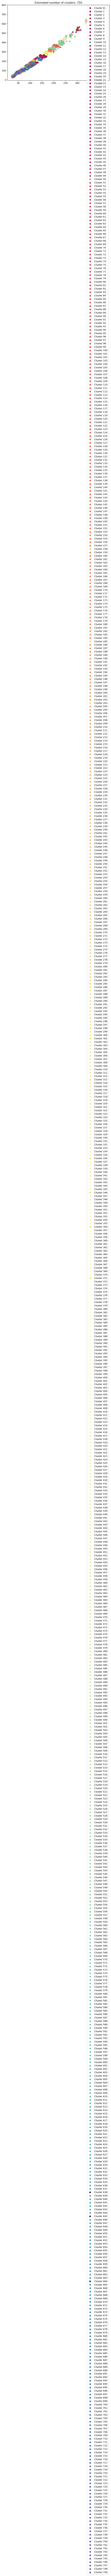

In [18]:
import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a sample dataset
data =X_ #, labels = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Create an instance of the AffinityPropagation model
af = AffinityPropagation()

# Fit the model to your data
af.fit(data)

# Get cluster assignments and exemplars
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

# Visualize the results
plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters_))
for cluster_idx, color in zip(range(n_clusters_), colors):
    cluster_mask = labels == cluster_idx
    cluster_center = data[cluster_centers_indices[cluster_idx]]
    plt.scatter(data[cluster_mask, 0], data[cluster_mask, 1], c=color, label=f'Cluster {cluster_idx}')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=color, markersize=12)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.legend()
plt.show()


## 10 Fuzzy C-Means Clustering

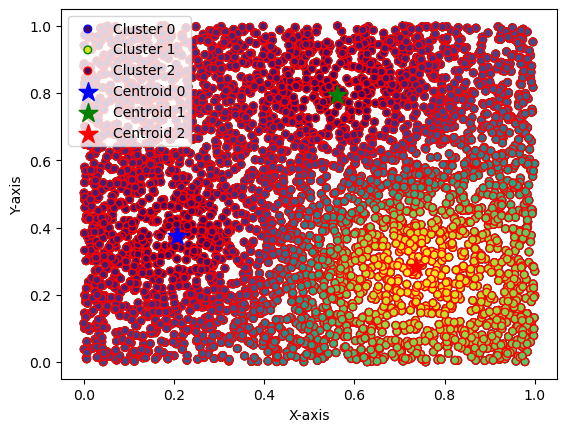

In [19]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate a random dataset
np.random.seed(42)
data_points = synthetic_data # np.random.rand(100, 2)

# Specify the number of clusters (K)
n_clusters = 3

# Specify the fuzziness coefficient (m)
m = 2.0

# Perform Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_points.T, n_clusters, m, error=0.005, maxiter=1000, init=None)

# u contains the cluster memberships for each data point
# cntr contains the cluster centroids

# Plot the data points and cluster centroids
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n_clusters):
    plt.scatter(data_points[:, 0], data_points[:, 1], c=u[i], s=30, edgecolor=colors[i], label=f'Cluster {i}')

for i in range(n_clusters):
    plt.scatter(cntr[i][0], cntr[i][1], c=colors[i], marker='*', s=200, label=f'Centroid {i}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
